### Films History (1980-2020)

Import libraries & data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Import data
df = pd.read_csv('C:/Users/ywjra/Desktop/Operation Analyst Exercise/Movie Industry Project/movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7665,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7666,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


Data Cleaning

In [4]:
# looping thourgh the columns to find any missing data and this 'for loop' gives us a percentage of the missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Total missing data for each column
df.isnull().sum()

name           0
rating        74
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2170
gross        148
company       17
runtime        4
dtype: int64

In [6]:
# Checking any duplicates and delete identical
duplicateDFRow = df[df.duplicated('name')]
print(duplicateDFRow)

df = df.drop_duplicates('name')
df

                   name rating      genre  year  \
1360           The Bear     PG  Adventure  1988   
1836            Impulse      R      Crime  1990   
2022           Paradise  PG-13      Drama  1991   
2104      Forever Young     PG      Drama  1992   
2368        Dream Lover      R      Drama  1993   
...                 ...    ...        ...   ...   
7526            The Kid      R  Biography  2019   
7529       Child's Play      R      Drama  2019   
7536              Shaft      R     Action  2019   
7556  After the Wedding  PG-13      Drama  2019   
7623        The Captain    NaN     Action  2019   

                               released  score    votes             director  \
1360   October 27, 1989 (United States)    7.7  17000.0  Jean-Jacques Annaud   
1836      April 6, 1990 (United States)    5.7   1200.0         Sondra Locke   
2022    October 4, 1991 (United States)    6.7   2700.0  Mary Agnes Donoghue   
2104  December 16, 1992 (United States)    6.3  45000.0          St

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7665,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7666,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [7]:
# Delete NaN data
df = df.dropna()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [8]:
# Check data types
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
# Change data types
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')
df["runtime"] = df["runtime"].astype('int64')
df["votes"] = df["votes"].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [10]:
# Noticed there is a discrepancy on Year & Released date year. Let's fix that!
df["year_released"] = df["released"].str.extract(r'(\d{4})').astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [11]:
# Identify anymore NaN
df.isnull().sum()

name             0
rating           0
genre            0
year             0
released         0
score            0
votes            0
director         0
writer           0
star             0
country          0
budget           0
gross            0
company          0
runtime          0
year_released    0
dtype: int64

In [12]:
# Final data frame before proceeding data exploration
df.sort_values(by=["year_released", "gross"])
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


Summary
1. Data frame filtered down to 5327/7668 films.
2. 156 films are repeated in the data.
3. 2185 films are missing in the data frame which includes one/or more of the column data: rating, released, score, votes, writer, star, country, budget, gross, company, runtime.
4. Discrepancy of "year" & "released" year. Created new column "year_released" beased on "released" data. 

Data Exploration

In [13]:
# Identify the Highest for each column
df.describe(include=['O']).T

,count,unique,top,freq
name,5327,5327,The Shining,1
rating,5327,8,R,2564
genre,5327,16,Comedy,1482
released,5327,2553,"October 11, 2002 (United States)",7
director,5327,2059,Woody Allen,33
writer,5327,3189,Woody Allen,32
star,5327,1846,Nicolas Cage,39
country,5327,52,United States,4243
company,5327,1481,Universal Pictures,326


In [99]:
# Best film of all time based on gross revenue
df.sort_values(by=['gross'], inplace=False, ascending=False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,2019
6644,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141,2015
7247,Black Panther,PG-13,Action,2018,"February 16, 2018 (United States)",7.3,661000,Ryan Coogler,Ryan Coogler,Chadwick Boseman,United States,200000000,1347597973,Marvel Studios,134,2018


Text(0.5, 1.0, 'Budget vs Gross')

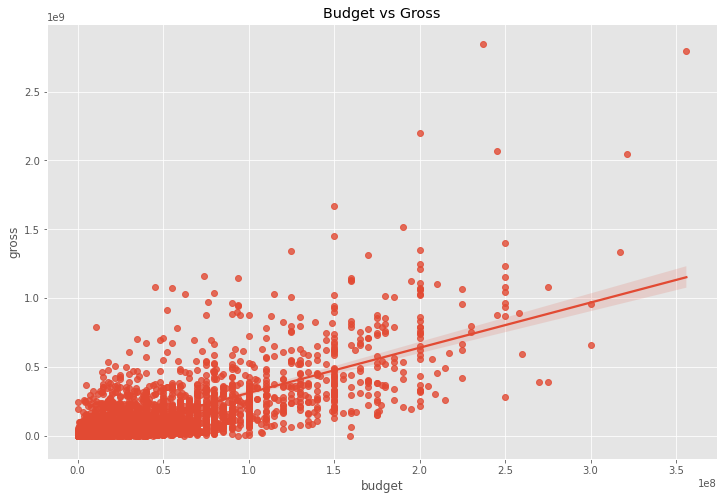

In [15]:
sns.regplot(x="budget", y="gross", data=df)
plt.title("Budget vs Gross")

Text(0.5, 1.0, 'gross vs score')

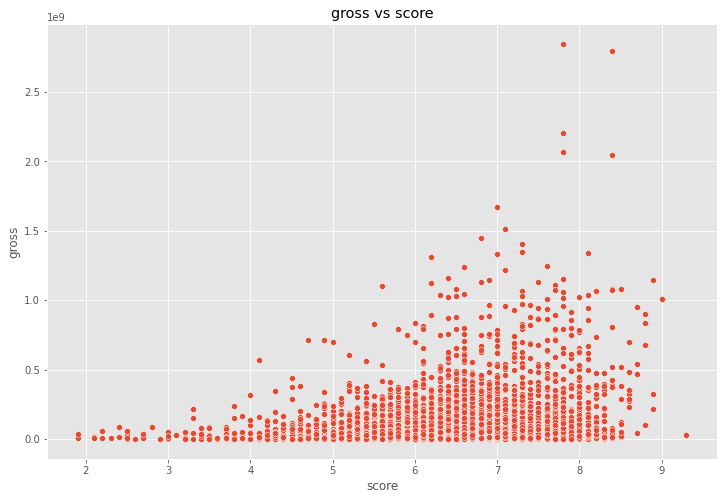

In [16]:
sns.scatterplot(x="score", y="gross", data=df)
plt.title("gross vs score")

Text(0.5, 1.0, 'votes vs gross')

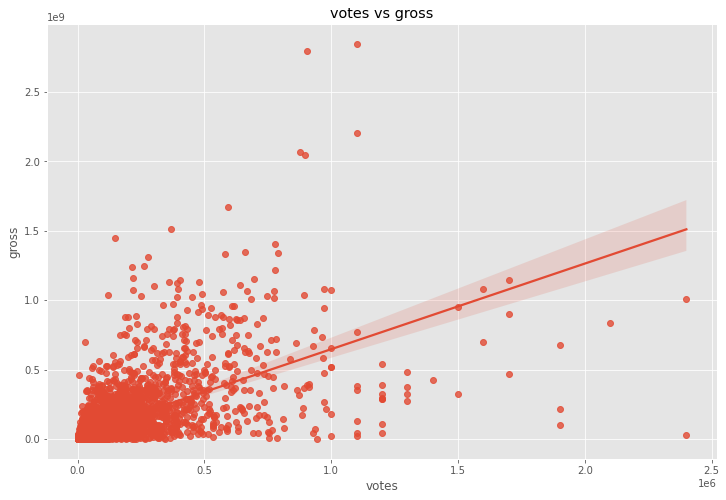

In [84]:
sns.regplot(x="votes", y="gross", data=df)
plt.title("votes vs gross")

In [18]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.066958,0.212036,0.329310,0.274917,0.078878,0.998716
score,0.066958,1.000000,0.471674,0.070920,0.221405,0.414141,0.072433
votes,0.212036,0.471674,1.000000,0.438412,0.617743,0.348944,0.209070
budget,0.329310,0.070920,0.438412,1.000000,0.739208,0.319044,0.321912
gross,0.274917,0.221405,0.617743,0.739208,1.000000,0.277417,0.269253
runtime,0.078878,0.414141,0.348944,0.319044,0.277417,1.000000,0.079207
year_released,0.998716,0.072433,0.209070,0.321912,0.269253,0.079207,1.000000


In [19]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.047321,0.303498,0.224001,0.240920,0.066275,0.991258
score,0.047321,1.000000,0.351078,-0.005275,0.126153,0.292031,0.051259
votes,0.303498,0.351078,1.000000,0.346103,0.553887,0.202994,0.299998
budget,0.224001,-0.005275,0.346103,1.000000,0.512839,0.231566,0.216966
gross,0.240920,0.126153,0.553887,0.512839,1.000000,0.175232,0.233748
runtime,0.066275,0.292031,0.202994,0.231566,0.175232,1.000000,0.066257
year_released,0.991258,0.051259,0.299998,0.216966,0.233748,0.066257,1.000000


In [20]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime,year_released
year,1.000000,0.069285,0.437367,0.317074,0.352902,0.097474,0.998703
score,0.069285,1.000000,0.496382,-0.008349,0.184731,0.411749,0.075106
votes,0.437367,0.496382,1.000000,0.493426,0.746112,0.297178,0.432711
budget,0.317074,-0.008349,0.493426,1.000000,0.694054,0.330768,0.306873
gross,0.352902,0.184731,0.746112,0.694054,1.000000,0.254631,0.342402
runtime,0.097474,0.411749,0.297178,0.330768,0.254631,1.000000,0.097559
year_released,0.998703,0.075106,0.432711,0.306873,0.342402,0.097559,1.000000


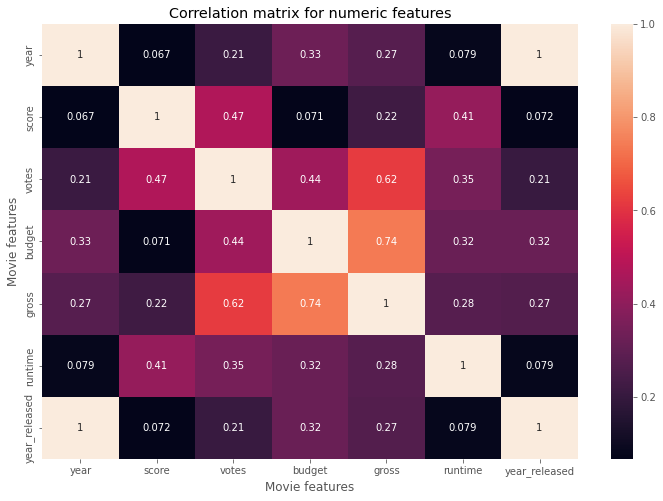

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [22]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
name,1.000000,0.103933,0.025298,0.788160,0.997334,-0.017511,0.320045,0.750528,0.816568,0.724640,0.088001,0.298691,0.999913,0.546862,0.056242,0.768772
rating,0.103933,1.000000,0.025582,0.093416,0.101333,0.026958,0.057890,0.069057,0.082626,0.093044,0.002970,0.195963,0.104030,-0.040206,0.050597,0.096121
genre,0.025298,0.025582,1.000000,0.024289,0.024855,-0.024719,-0.012376,0.033984,0.027855,0.037050,-0.013207,0.023234,0.025229,0.010512,-0.002078,0.030708
year,0.788160,0.093416,0.024289,1.000000,0.788881,-0.009683,0.281573,0.589206,0.649283,0.584831,0.081758,0.257228,0.788059,0.410872,0.054047,0.881080
released,0.997334,0.101333,0.024855,0.788881,1.000000,-0.021139,0.324093,0.749041,0.814586,0.724245,0.089352,0.300916,0.997229,0.547737,0.058444,0.767575
score,-0.017511,0.026958,-0.024719,-0.009683,-0.021139,1.000000,-0.042089,-0.006039,-0.020035,0.007428,0.009333,-0.006475,-0.017353,-0.015825,0.012334,-0.009483
votes,0.320045,0.057890,-0.012376,0.281573,0.324093,-0.042089,1.000000,0.199419,0.232523,0.191127,-0.019165,0.357221,0.320112,0.010329,0.123691,0.283652
director,0.750528,0.069057,0.033984,0.589206,0.749041,-0.006039,0.199419,1.000000,0.726544,0.637958,0.083217,0.117387,0.750484,0.487956,-0.020026,0.569378
writer,0.816568,0.082626,0.027855,0.649283,0.814586,-0.020035,0.232523,0.726544,1.000000,0.632143,0.083285,0.199443,0.816464,0.482910,0.026638,0.643555
star,0.724640,0.093044,0.037050,0.584831,0.724245,0.007428,0.191127,0.637958,0.632143,1.000000,0.086476,0.127532,0.724467,0.444894,0.040481,0.568294


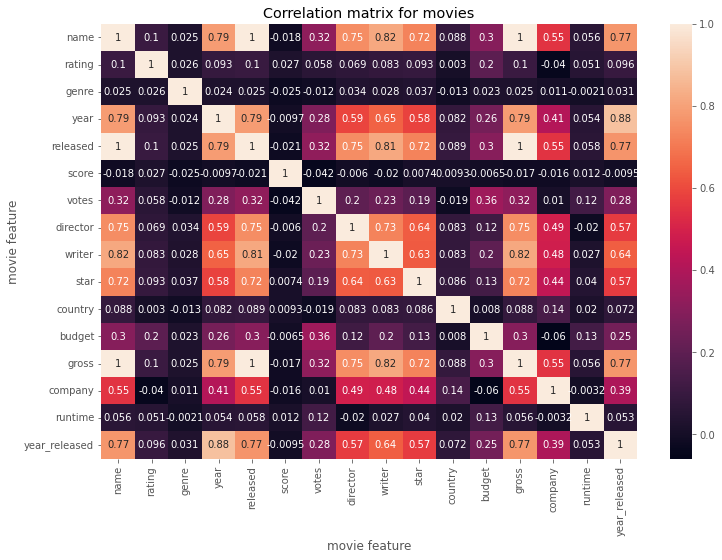

In [23]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for movies')
plt.xlabel('movie feature')
plt.ylabel('movie feature')
plt.show()

In [24]:
correlation_matrix = df.corr()
cormaxstack = correlation_matrix .unstack()
scmstack = cormaxstack.sort_values()
scmstack

year           score            0.066958
score          year             0.066958
               budget           0.070920
budget         score            0.070920
year_released  score            0.072433
score          year_released    0.072433
runtime        year             0.078878
year           runtime          0.078878
year_released  runtime          0.079207
runtime        year_released    0.079207
year_released  votes            0.209070
votes          year_released    0.209070
               year             0.212036
year           votes            0.212036
gross          score            0.221405
score          gross            0.221405
gross          year_released    0.269253
year_released  gross            0.269253
year           gross            0.274917
gross          year             0.274917
runtime        gross            0.277417
gross          runtime          0.277417
runtime        budget           0.319044
budget         runtime          0.319044
year_released  b

In [25]:
scmstack[((scmstack) > 0.5) & ((scmstack) < 1.0)].sort_values(ascending = False)

year_released  year             0.998716
year           year_released    0.998716
gross          budget           0.739208
budget         gross            0.739208
votes          gross            0.617743
gross          votes            0.617743
dtype: float64

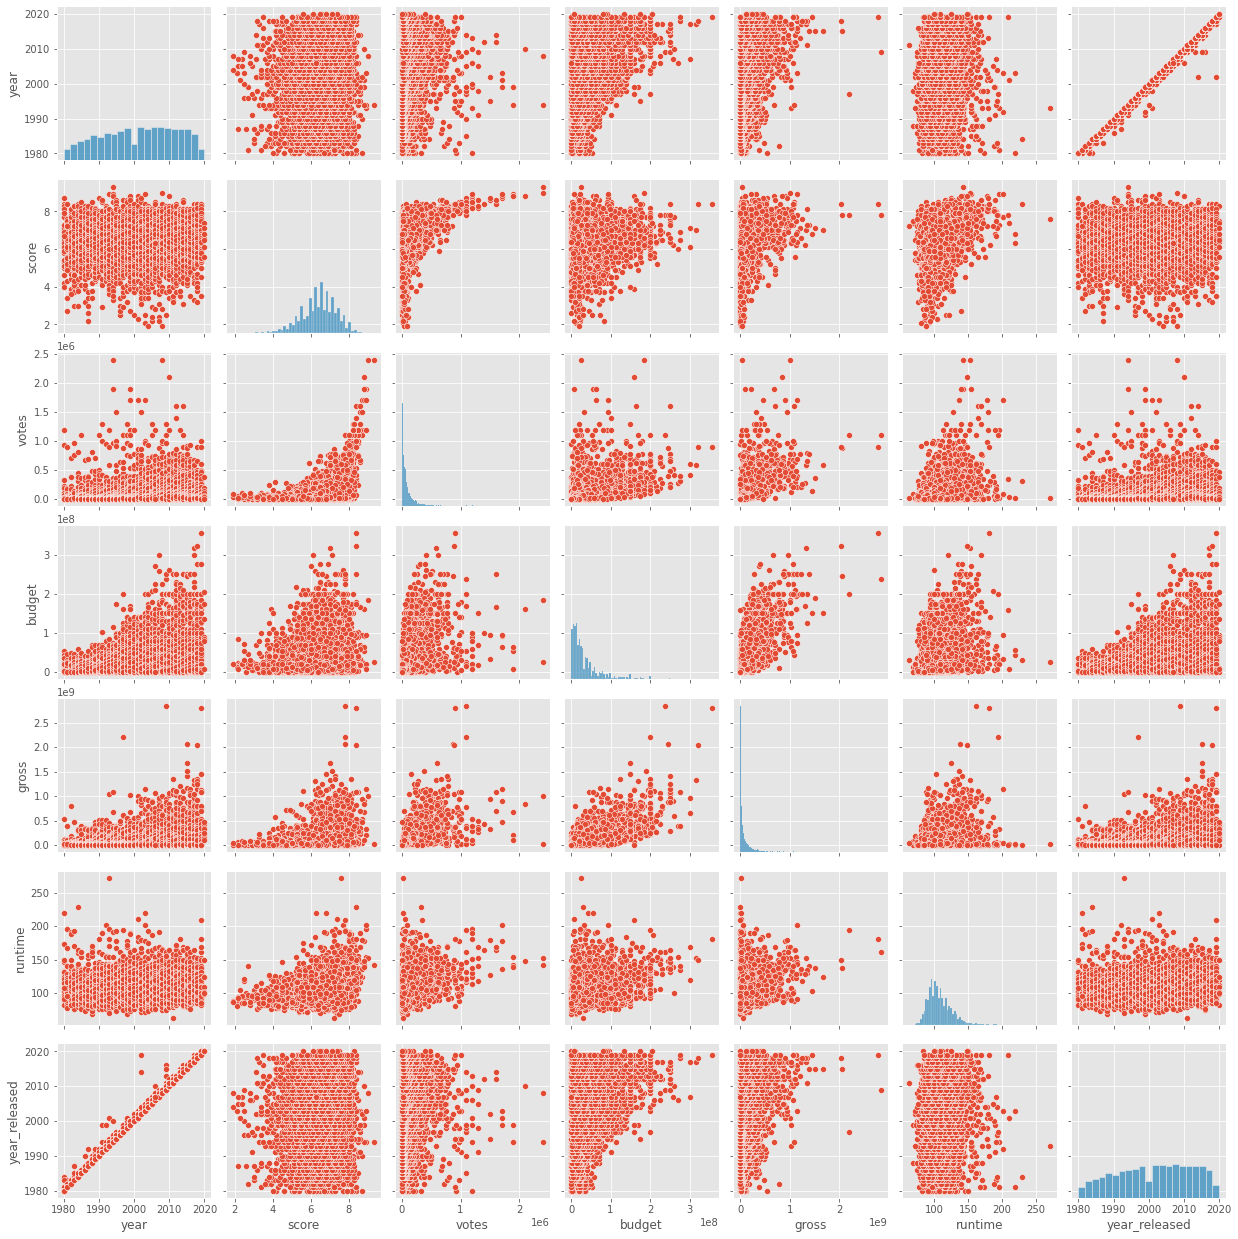

In [26]:
sns.pairplot(df,diag_kind ='hist')

In [67]:
# Top 15 highest budget & gross revenue from production company between 1980 to 2020
cbgt = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
cbgt.head(15)

t15cbgt = cbgt.reset_index()
t15cbgt = t15cbgt.head(15)
t15cbgt

C:\Users\ywjra\AppData\Local\Temp\ipykernel_70760\3441738758.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cbgt = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)


,company,budget,gross
0,Warner Bros.,19079300000,53248138461
1,Universal Pictures,15728130001,50256784720
2,Columbia Pictures,15011107000,40870093831
3,Paramount Pictures,13213450000,38826131225
4,Twentieth Century Fox,11239600000,38445170810
5,Walt Disney Pictures,9876700000,32859517114
6,New Line Cinema,5356200000,18749590725
7,Marvel Studios,2444000000,13546776896
8,DreamWorks Animation,3344000000,11873612858
9,Dreamworks Pictures,3702700000,10924475124


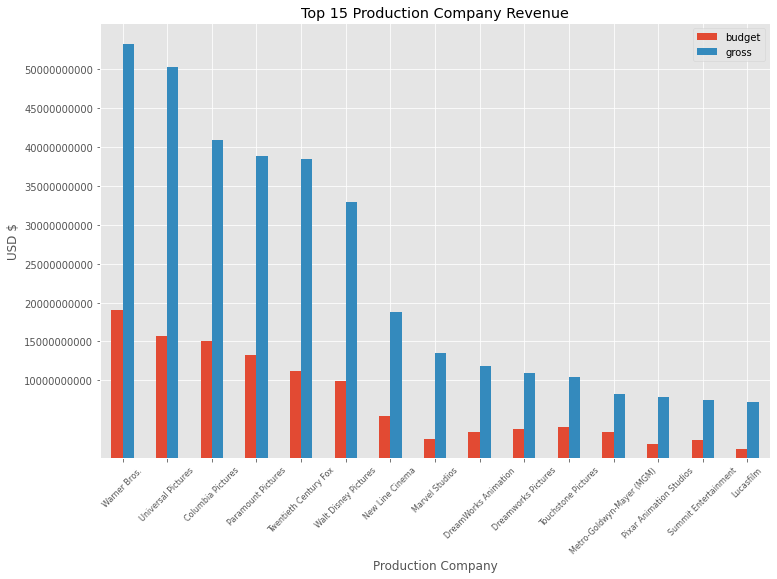

In [83]:
ax = t15cbgt.plot.bar(x ='company', rot = 0)
plt.title("Top 15 Production Company Revenue")
plt.xlabel("Production Company")
plt.ylabel("USD $")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], rotation = '45', size=8)
plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}'.format(x) for x in vals])
plt.tight_layout
plt.show()


In [30]:
# Popular rating film
Film_Rating = df["rating"].value_counts()
Film_Rating

R            2564
PG-13        1674
PG            903
G             108
Not Rated      46
Unrated        17
NC-17          13
TV-MA           2
Name: rating, dtype: int64

Text(0.5, 1.0, 'rating vs gross')

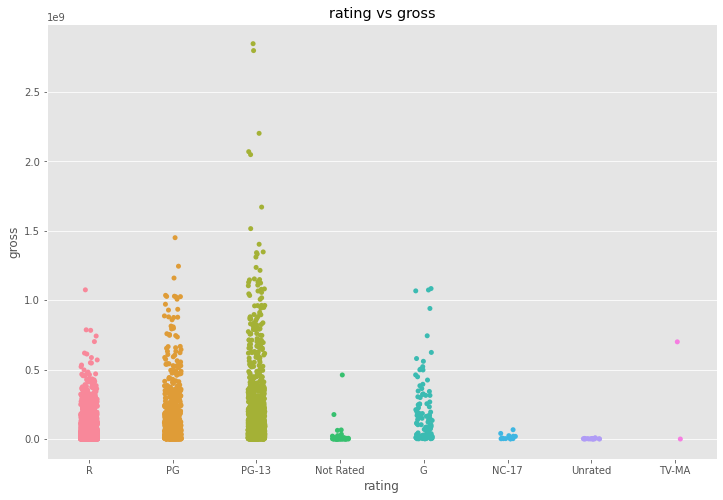

In [85]:
sns.stripplot(x="rating", y="gross", data=df)
plt.title("rating vs gross")

In [32]:
# Popular film genre
Film_Genre = df['genre'].value_counts()
Film_Genre

Comedy       1482
Action       1380
Drama         843
Crime         388
Adventure     325
Biography     308
Animation     272
Horror        246
Fantasy        41
Mystery        17
Thriller        8
Sci-Fi          6
Romance         5
Family          3
Western         2
History         1
Name: genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Animation'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Western'),
  Text(13, 0, 'Sci-Fi'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Mystery')])

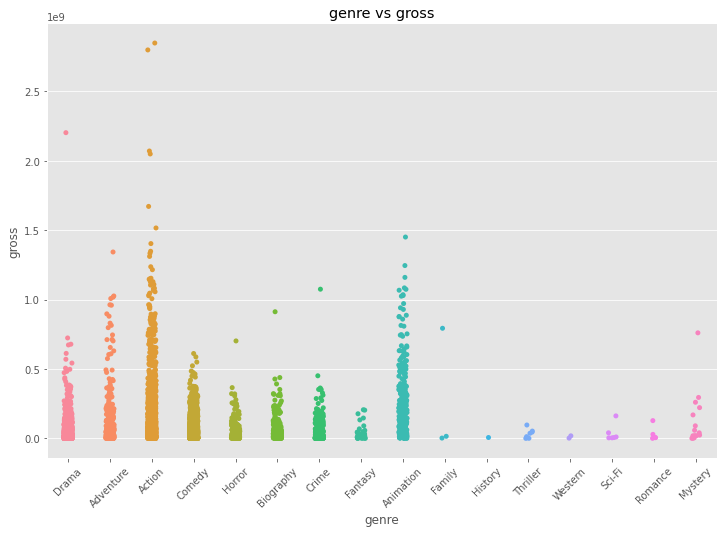

In [94]:
sns.stripplot(x='genre', y='gross', data=df)
plt.title("genre vs gross")
plt.xticks(rotation = '45')